In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sos

In [2]:
df = pd.read_csv('loan_train.csv')

In [3]:
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df = df.copy()
df=df.replace('3+','3')

In [6]:
len(np.where(pd.isnull(df))[0])

149

<AxesSubplot:>

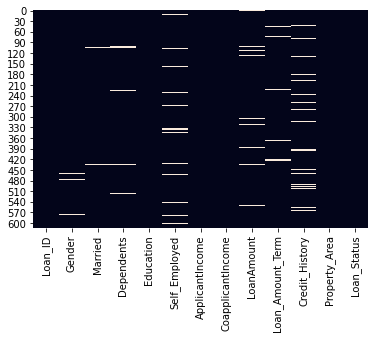

In [7]:
#so there are 149 null elements in the dataset now let's locate them then deal with them.
sos.heatmap(df.isnull(), cbar=False)

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
np.where(df['Credit_History'].isnull())

(array([ 16,  24,  30,  42,  79,  83,  86,  95, 117, 125, 129, 130, 156,
        181, 187, 198, 219, 236, 237, 259, 260, 279, 309, 313, 317, 318,
        323, 348, 363, 377, 392, 395, 411, 444, 449, 451, 460, 473, 490,
        491, 497, 503, 506, 530, 533, 544, 556, 565, 583, 600]),)

In [10]:
median = df['LoanAmount'].median()
df['LoanAmount'].fillna(median,inplace=True)

In [11]:
median = df['Loan_Amount_Term'].median()
df['Loan_Amount_Term'].fillna(median,inplace=True)

In [12]:
corr_matrix = df.corr()

<AxesSubplot:>

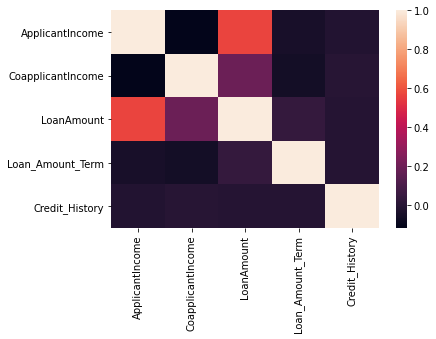

In [13]:
sos.heatmap(corr_matrix)

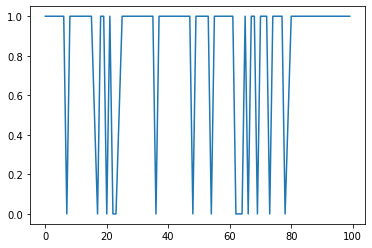

In [20]:
x = np.arange(0,100)
plt.plot(x,df['Credit_History'][0:100])

In [15]:
#the figure shows that the credit_history null data can be replaced with the median value of neighbouring cells.    

In [18]:
i = 1
count = df['Credit_History'].isnull().sum()
arr = np.where(df['Credit_History'].isnull())
c = 0
while(i<count):
    if(arr[0][i]-arr[0][i-1]==1):
        c+=1
    i+=1
i = 0
while(i<count):
    if(c!=0):
        if(arr[0][i]-arr[0][i+1]==-1):
            df['Credit_History'][arr[0][i]],df['Credit_History'][arr[0][i]]=(df['Credit_History'][arr[0][i]-1]+df['Credit_History'][arr[0][i]+2])/2,(df['Credit_History'][arr[0][i]-1]+df['Credit_History'][arr[0][i]+2])/2
            i+=1
            c-=1
    else:
        df['Credit_History'][arr[0][i]] = (df['Credit_History'][arr[0][i]-1]+df['Credit_History'][arr[0][i]+1])/2
    i+=1    

In [21]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
df = df.dropna()

In [23]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [25]:
#now let's turn some parameters into numbers
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df['Gender']=encoder.fit_transform(df[['Gender']])
df['Married']=encoder.fit_transform(df[['Married']])
df['Dependents']=encoder.fit_transform(df[['Dependents']])
df['Education']=encoder.fit_transform(df[['Education']])
df['Self_Employed']=encoder.fit_transform(df[['Self_Employed']])
df['Property_Area']=encoder.fit_transform(df[['Property_Area']])
df['Loan_Status']=encoder.fit_transform(df[['Loan_Status']])


In [26]:
df.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [27]:
#ID has no importance in such a problem so we can drop it
df=df.drop('Loan_ID',axis=1)

In [28]:
#now the dataset is cleaned and we are ready to get a prediction model.
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
x = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
decision_tree.predict(x_train)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1.

In [30]:
prediction =  decision_tree.predict(x_test)
accuracy = len(np.where(prediction==y_test)[0])/len(y_test)
accuracy

0.6885245901639344

In [31]:
df['Loan_Status']

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 554, dtype: float64

In [85]:
test_data = pd.read_csv('loan_test.csv')

In [32]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)
random_forest_prediction = random_forest.predict(x_test)
accuracy = len(np.where(prediction==y_test)[0])/len(y_test)
accuracy

0.6885245901639344

145